# Segmentación de clientes

El objetivo es encontrar segmentos (grupos) de clientes minoristas en función de su patrón de consumo anual en diversas categorías de productos[here](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

In [5]:
import seaborn as sns
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [1]:
import pandas as pd
customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


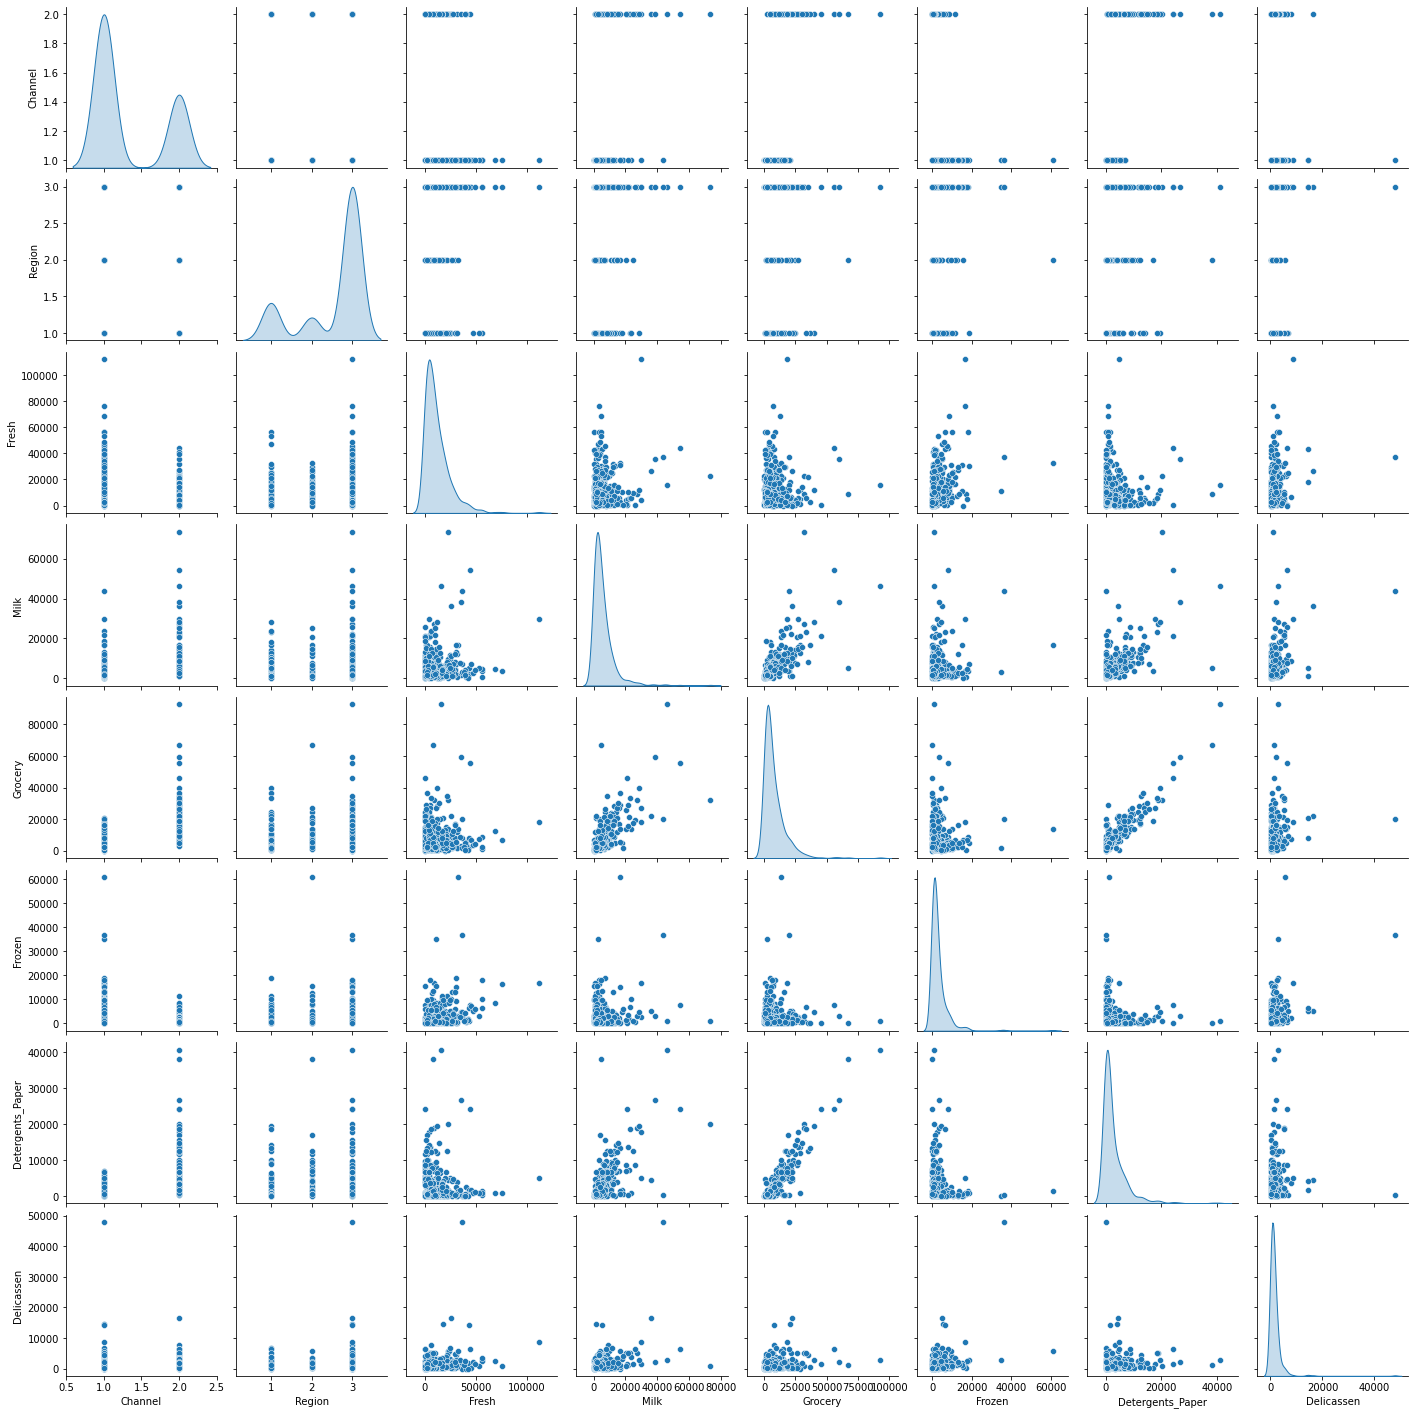

In [3]:
#attributes_spotify.insert(14, "artist_nro", a, True) 
#cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'artist_nro']
sns.pairplot(customers, diag_kind="kde")

In [13]:
#KMeans?
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


For n_clusters = 2 The average silhouette_score is : 0.5115333882980367
For n_clusters = 3 The average silhouette_score is : 0.4764089086483815
For n_clusters = 4 The average silhouette_score is : 0.3955556136306276
For n_clusters = 5 The average silhouette_score is : 0.3832957495230123
For n_clusters = 6 The average silhouette_score is : 0.37513873992816876
For n_clusters = 7 The average silhouette_score is : 0.31332057517476586
For n_clusters = 8 The average silhouette_score is : 0.339003313105964
For n_clusters = 9 The average silhouette_score is : 0.3160467608076077
For n_clusters = 10 The average silhouette_score is : 0.3166344239965193


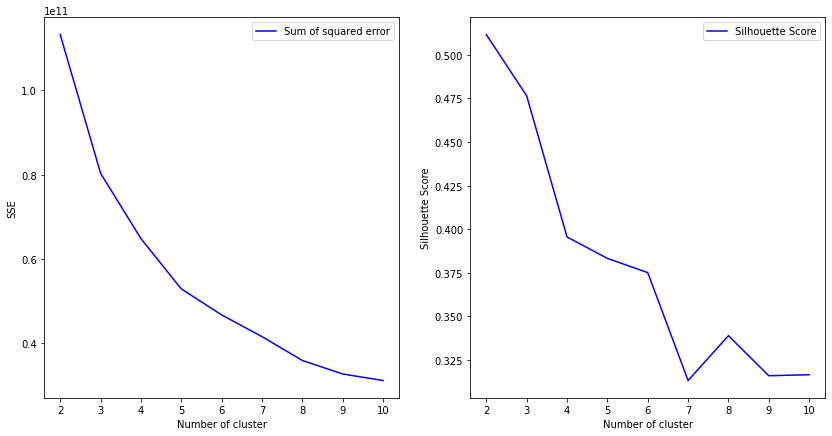

In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
elbow = []
ss = []
for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = KMeans(init='k-means++',n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(customers)
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(customers, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()



#estimador = KMeans(init='k-means++', n_clusters=4)
#estimador.fit(customers)

#metrics.silhouette_score(customers, estimador.labels_, metric='euclidean', sample_size=440)


For n_clusters = 2 The average silhouette_score is : 0.5115333882980367
For n_clusters = 3 The average silhouette_score is : 0.4764089086483815
For n_clusters = 4 The average silhouette_score is : 0.3866313675434283
For n_clusters = 5 The average silhouette_score is : 0.3787158454245693
For n_clusters = 6 The average silhouette_score is : 0.3782441887405355
For n_clusters = 7 The average silhouette_score is : 0.3313000562028635
For n_clusters = 8 The average silhouette_score is : 0.33500368668275454
For n_clusters = 9 The average silhouette_score is : 0.3119100971343945
For n_clusters = 10 The average silhouette_score is : 0.29566305113817565


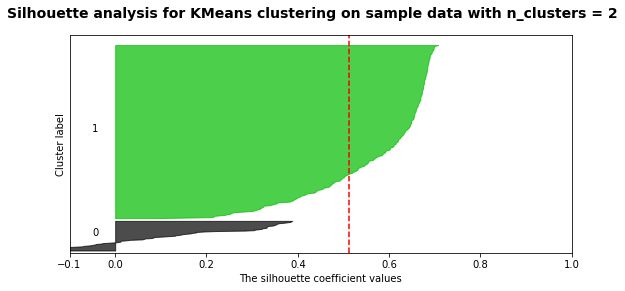

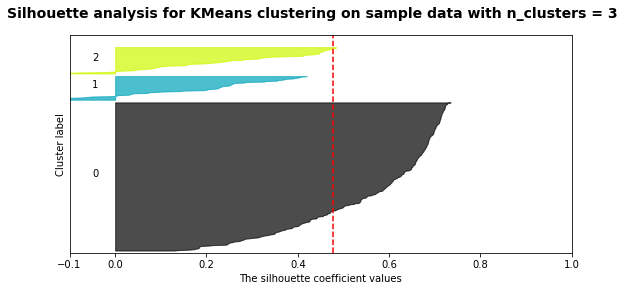

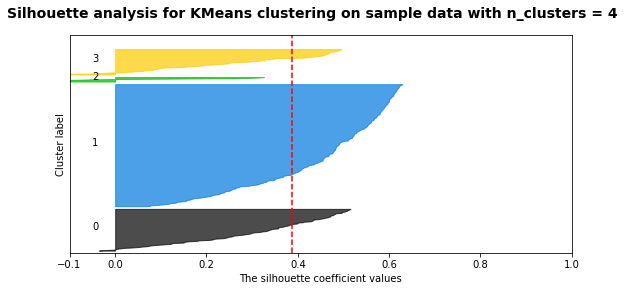

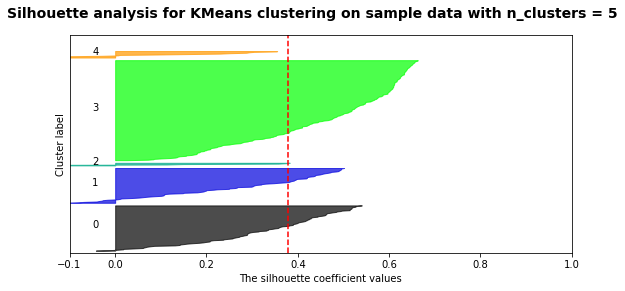

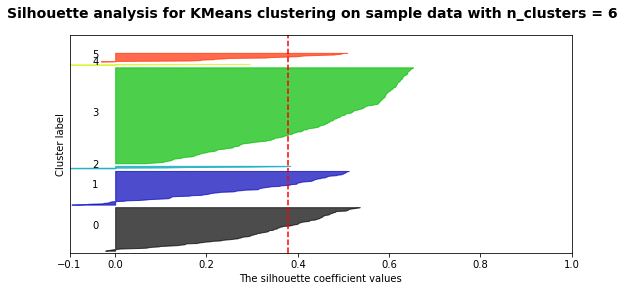

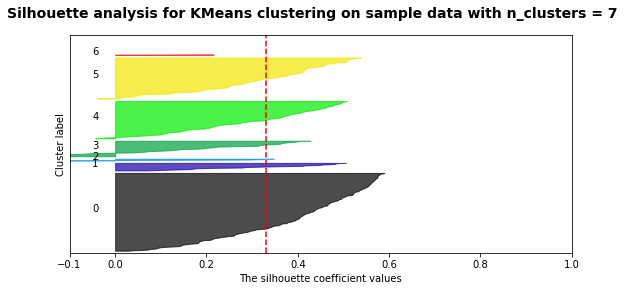

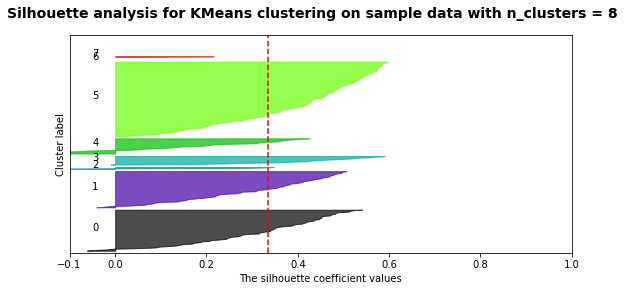

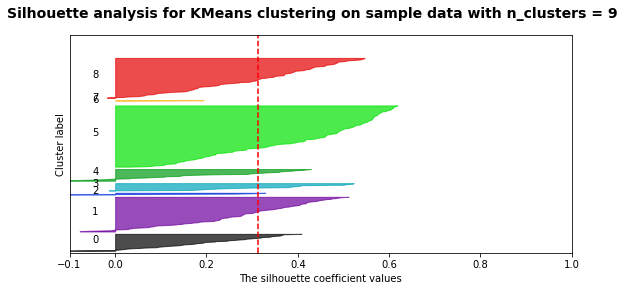

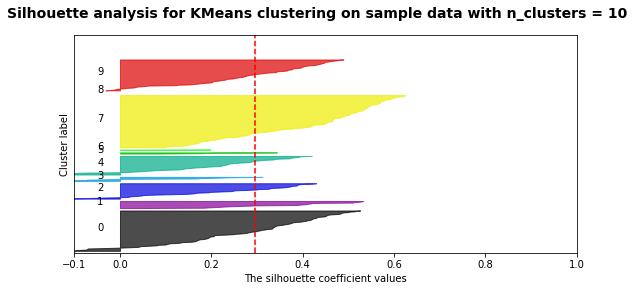

In [44]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10 ]

elbow = []
ss = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 440 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(customers)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers, cluster_labels)
    
    ss.append(silhouette_avg)
    elbow.append(clusterer.inertia_)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 5  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



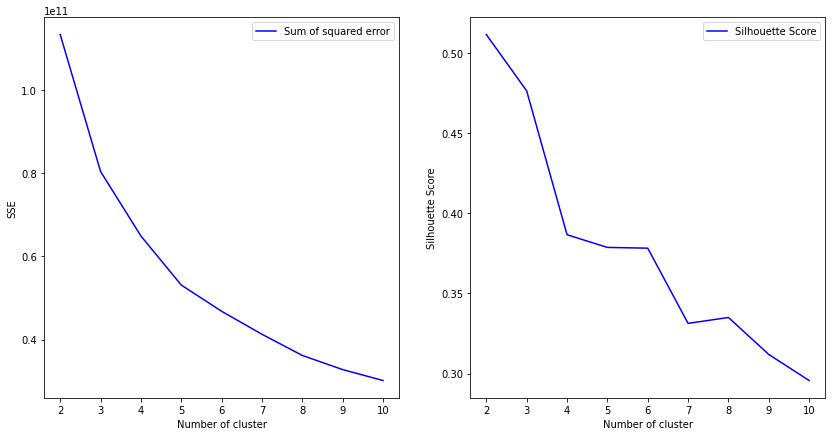

In [45]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

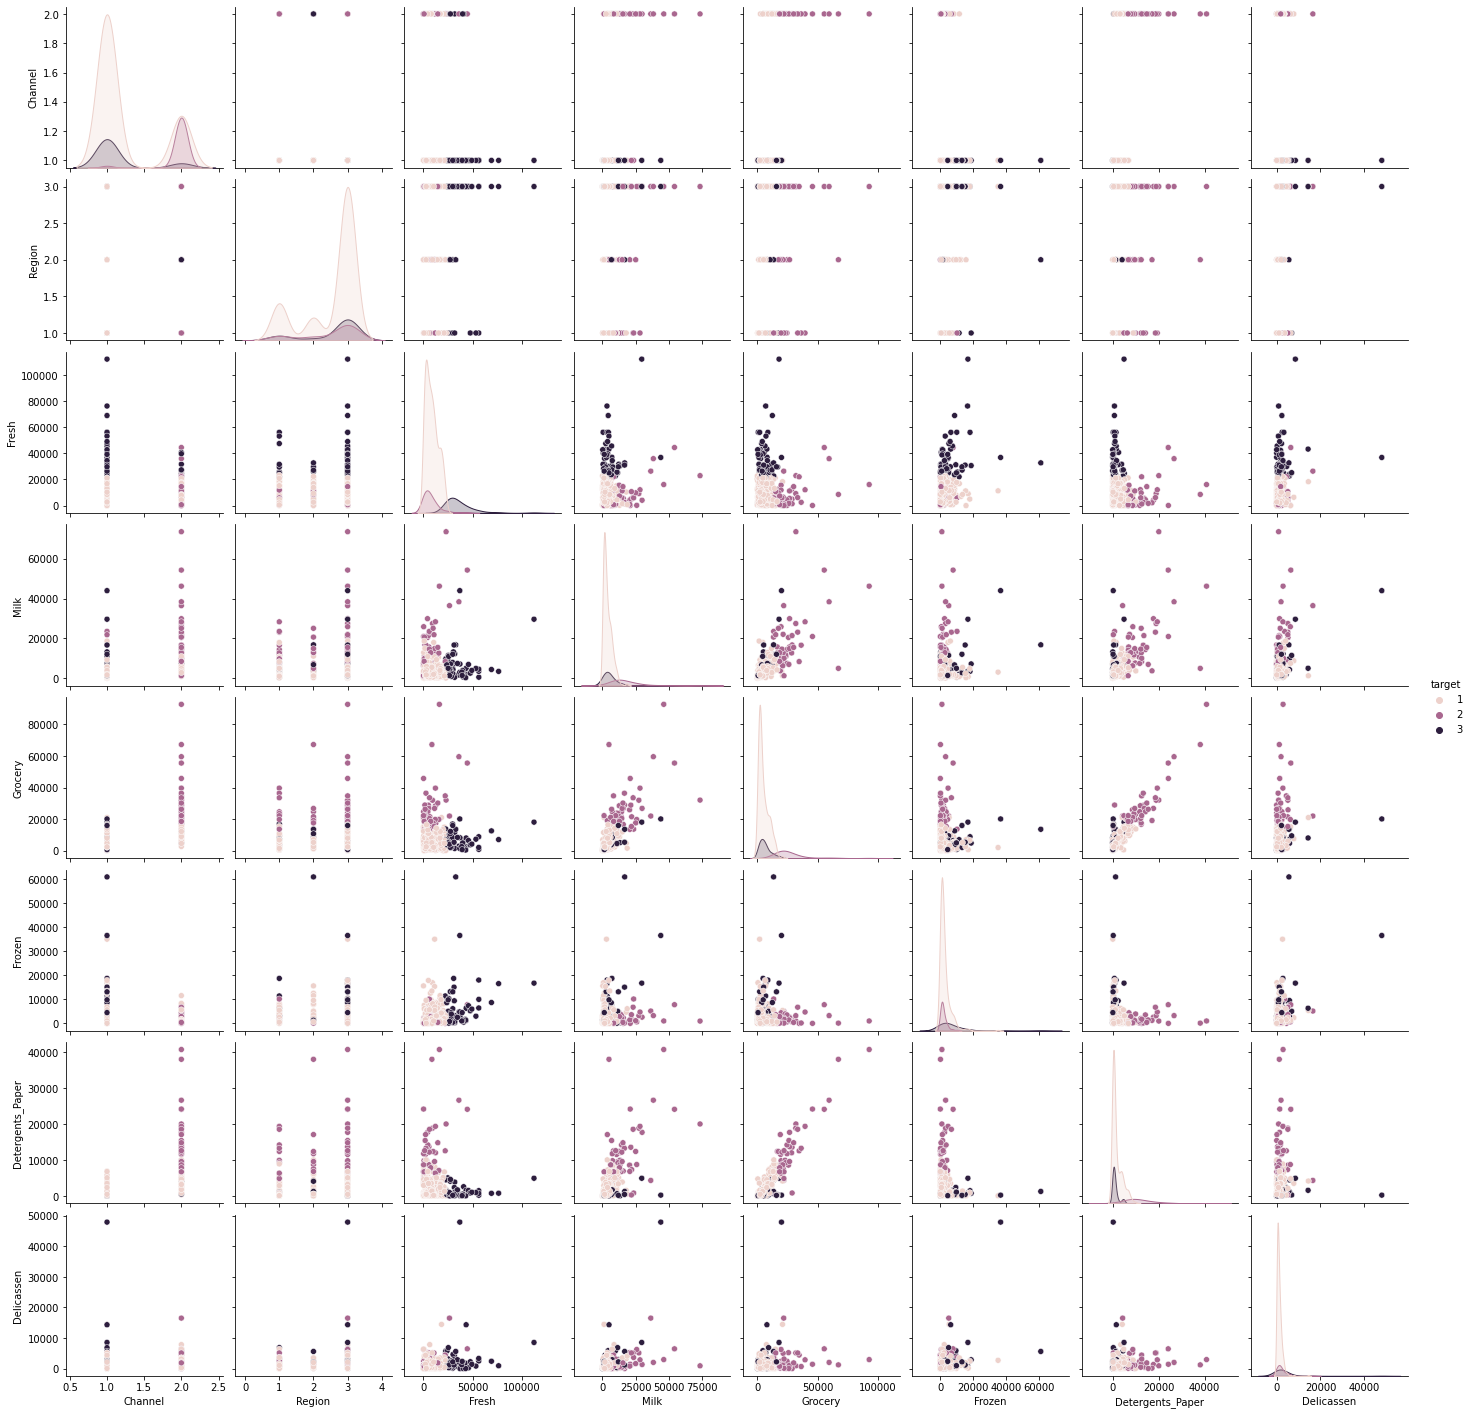

In [48]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(customers)
    
customers['target'] = cluster_labels + 1
sns.pairplot(customers, hue='target')